# Simple plotting examples

In [1]:
import mne
import numpy as np

from nemo.epochs import get_epochs
from nemo.utils import get_include_events_to_name

In [2]:
epochs_dict = dict(empe=get_epochs(include_events="empe"), afim=get_epochs(include_events="afim"))
epochs = {k: mne.concatenate_epochs(list(v.values())) for k, v in epochs_dict.items()}

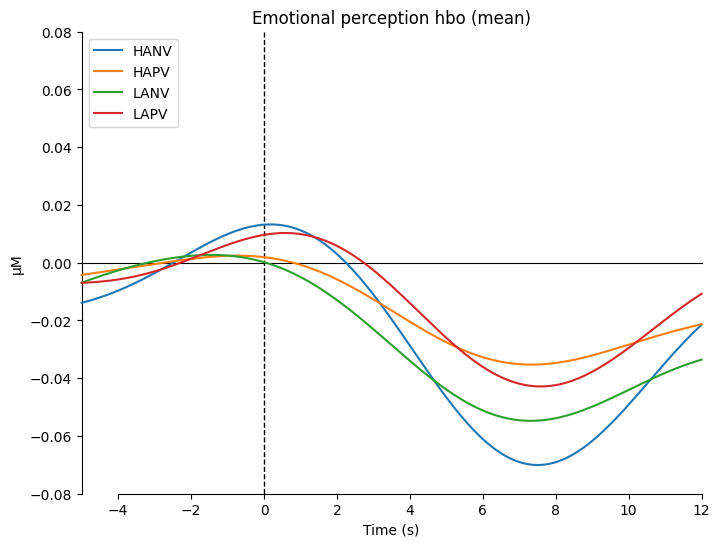

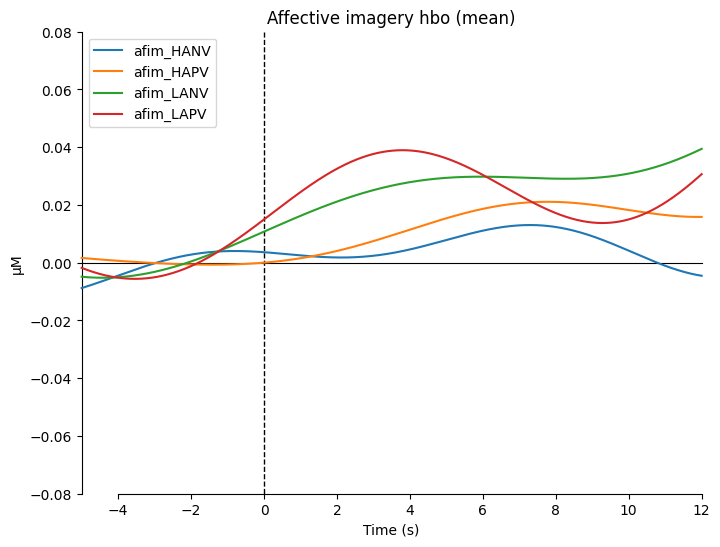

In [3]:
picks = "hbo"

for task, task_epochs in epochs.items():
    evoked_dict = {
        condition: task_epochs[condition].average(picks=picks)
        for condition in task_epochs.event_id
    }
    mne.viz.plot_compare_evokeds(
        evoked_dict,
        combine="mean",
        ylim=dict(hbo=[-0.08, 0.08]),
        title=f"{get_include_events_to_name()[task].capitalize()} {picks}",
    )

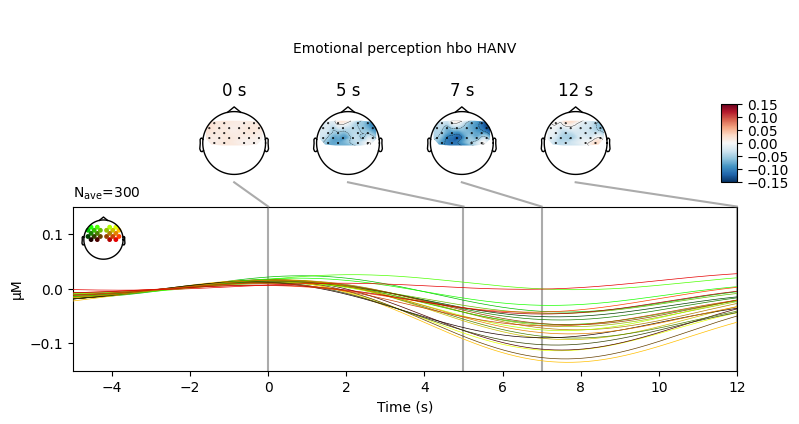

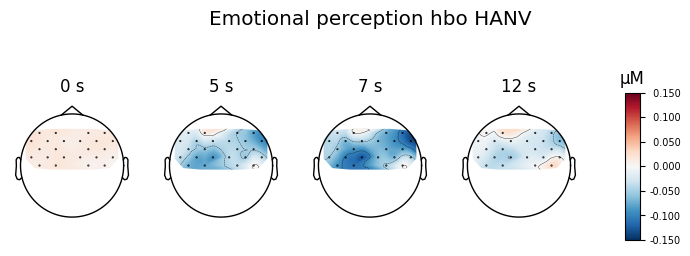

In [4]:
vmin = -0.15
vmax = -vmin
contours = np.linspace(vmin, vmax, 6 + 1)
topomap_args = {
    "extrapolate": "local",
    "time_format": "%d s",
    "vmin": vmin,
    "vmax": vmax,
    "contours": contours,
    "cmap": "RdBu_r",
    "cbar_fmt": "% 4.3f",
    "sensors": True,
}
ts_args = {
    "ylim": dict(hbo=[vmin, vmax]),
    "spatial_colors": True,
}
times = [0, 5, 7, 12]
task = "empe"
condition = "HANV"
evoked = epochs[task][condition].average(picks=picks)

joint = evoked.plot_joint(
    times=times,
    topomap_args=topomap_args,
    ts_args=ts_args,
    title=f"{get_include_events_to_name()[task].capitalize()} {picks} {condition}",
)
topo = evoked.plot_topomap(
    times=times,
    **topomap_args,
    title=f"{get_include_events_to_name()[task].capitalize()} {picks} {condition}",
)